# Primer practico diplodatos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import scipy
from scipy import stats

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
seaborn.set_context(context='talk', font_scale=1.2)

In [4]:
dataset = pandas.read_csv("hfi_cc_2018.csv")

In [5]:
dataset.shape

(1458, 123)

In [6]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

In [7]:
dataset[:5]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [8]:
dataset.columns  # Way too many columns!

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [9]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


# 1) Estadísticos descriptivos

1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [10]:
#Se calculan los rangos para todas las variables que no son categóricas

In [11]:

rangos={}
for col in important_cols:
    try:
        rangos[col]=numpy.ptp(dataset[col])
    except:
        pass
pandas.DataFrame.from_dict(rangos,orient="index")
              
        

/home/simon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,0
year,8.000000
pf_identity_legal,10.000000
pf_identity_parental_marriage,10.000000
pf_identity_parental_divorce,10.000000
pf_identity_parental,10.000000
pf_identity_sex_male,10.000000
pf_identity_sex_female,10.000000
pf_identity_sex,10.000000
pf_identity_divorce,10.000000
pf_identity,10.000000


1.2 Obtener media, mediana y desviación estándar de las variables pf_identity
y hf_score en el mundo y compararla con la de Latinoamérica y el caribe.
¿Tiene sentido calcular la moda?

In [12]:
# se calculan las medidas descriptivas para las variables 'pf_identity' y 'hf_score' para todos los paises que conforman 
#la muestra y luego para el caso particular de los paises latinoamericanos y caribeños

In [13]:
datos_pf=pandas.DataFrame(columns=["Mundo","Latinoamerica y el Caribe"],index=["Mediana","Media","Desv.Est"])
datos_pf["Mundo"]["Mediana"]= numpy.nanmedian(dataset["pf_identity"])        
datos_pf["Mundo"]["Media"]= numpy.nanmean(dataset["pf_identity"])      
datos_pf["Mundo"]["Desv.Est"]= numpy.nanstd(dataset["pf_identity"])    
datos_pf["Latinoamerica y el Caribe"]["Mediana"]= numpy.nanmedian(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'])        
datos_pf["Latinoamerica y el Caribe"]["Media"]= numpy.nanmean(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'])      
datos_pf["Latinoamerica y el Caribe"]["Desv.Est"]= numpy.nanstd(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'])  


datos_hf=pandas.DataFrame(columns=["Mundo","Latinoamerica y el Caribe"],index=["Mediana","Media","Desv.Est"])
datos_hf["Mundo"]["Mediana"]= numpy.nanmedian(dataset["hf_score"])        
datos_hf["Mundo"]["Media"]= numpy.nanmean(dataset["hf_score"])      
datos_hf["Mundo"]["Desv.Est"]= numpy.nanstd(dataset["hf_score"])    
datos_hf["Latinoamerica y el Caribe"]["Mediana"]= numpy.nanmedian(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'])        
datos_hf["Latinoamerica y el Caribe"]["Media"]= numpy.nanmean(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'])      
datos_hf["Latinoamerica y el Caribe"]["Desv.Est"]= numpy.nanstd(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'])  

print ("pf_identity")
print(datos_pf)
print("hf_score")
print(datos_hf)

pf_identity
            Mundo Latinoamerica y el Caribe
Mediana   9.16667                        10
Media     7.33418                   8.76509
Desv.Est  3.15833                   1.70804
hf_score
            Mundo Latinoamerica y el Caribe
Mediana   6.92384                   7.02804
Media     6.99344                   7.04798
Desv.Est  1.02544                   0.60759


La variable que presenta mayores diferencias entre las medias y medianas del Mundo y deLatinoamerica y el Caribe es pf_identity, esta tiene ambas medidas más elevadas en la última region y una desviación estándar más baja, lo que indica una menor heterogeneidad en los datos. Por otro lado, la mediana y la media de la variable hf_score no presentan grandes diferencias entre el Mundo y Latinoamerica y el Caribe, aunque si se observa una mayor desviación estándar en Mundo.



In [14]:
print('Mundo')
print("Moda pf_identity: ",scipy.stats.mode(dataset["pf_identity"],nan_policy="omit")[0][0],". Se repite ",scipy.stats.mode(dataset["pf_identity"],nan_policy="omit")[1][0]," veces")
print("Moda hf_score: ",scipy.stats.mode(dataset["hf_score"],nan_policy="omit")[0][0],". Se repite ",scipy.stats.mode(dataset["hf_score"],nan_policy="omit")[1][0]," veces")  

print('Latinoamerica y el caribe ')
print("Moda pf_identity: ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'],nan_policy="omit")[0][0], ". Se repite ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'],nan_policy="omit")[1][0]," veces")
print("Moda hf_score: ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'],nan_policy="omit")[0][0], ". Se repite ",scipy.stats.mode(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'],nan_policy="omit")[1][0]," veces")


Mundo
Moda pf_identity:  10.0 . Se repite  601.0  veces
Moda hf_score:  7.5681402879999995 . Se repite  1.0  veces
Latinoamerica y el caribe 
Moda pf_identity:  10.0 . Se repite  136.0  veces
Moda hf_score:  6.469847841 . Se repite  1.0  veces


En este caso no tiene sentido calcular la moda para la variable hf_score ya que no se encuentra ningún valor que se repita. En cambio, en pf_identity, el valor 10 se repite 601 veces en el Mundo y 136 veces en Latinoamerica y el Caribe.

1.3  ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?

Si bien pf_identity y hf_score estan relacionadas por formar parte la primera de la última, la relación no es directa, ya que las libertades económicas (ef_score) también se utilizan para el cálculo del indicador final (hf_score). Es decir que un país con un buen nivel de libertades personales podría no tener un alto hf_score debido a un bajo nivel de libertades económicas.

1.4 ¿Cómo pueden sanearse los valores faltantes?

Los valores faltantes pueden sanearse eliminando aquellas filas que tengan datos Na.

In [15]:
limpieza_na=dataset[important_cols]
limpieza_na[:5]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


In [16]:
limpieza_na.shape

(1458, 17)

In [17]:
limpieza=limpieza_na.dropna()
limpieza

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250,7.54,34.0,7.568140,48.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250,6.49,106.0,6.083277,130.0
10,2016,BGD,Bangladesh,South Asia,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,1.250,6.30,120.0,5.801300,138.0
12,2016,BLR,Belarus,Eastern Europe,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000,6.23,123.0,6.144514,128.0
13,2016,BEL,Belgium,Western Europe,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250,7.32,52.0,8.153589,27.0


1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos?
¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Para detectar los outliers se utilizará el método intercuartil aplicado a todos los países. Se considerará outliers a todos aquellos valores que caigan por debajo del cuartil 1 menos 1.5 veces el rango intercuartil y por encima del cuartil 3 mas 1.5 veces el rango intercuartil.

In [18]:
# Para 'hf_score'
quartiles=numpy.nanquantile(dataset["hf_score"],[0.25,0.75])

rango_intercuartil=quartiles[1]-quartiles[0]

extremo_max, extremo_min = quartiles[1]+rango_intercuartil,quartiles[0]-rango_intercuartil

print("Cantidad de valores menores al extremo inferior: ",len(dataset[dataset["hf_score"]<extremo_min]) )


print("Cantidad de valores mayores al extremo superior: ",len(dataset[dataset["hf_score"]>extremo_max]) )

Cantidad de valores menores al extremo inferior:  19
Cantidad de valores mayores al extremo superior:  0


In [19]:
# Para pf_identity

quartiles=numpy.nanquantile(dataset["pf_identity"],[0.25,0.75])

rango_intercuartil=quartiles[1]-quartiles[0]

extremo_max, extremo_min = quartiles[1]+rango_intercuartil,quartiles[0]-rango_intercuartil

print("Cantidad de valores menores al extremo inferior: ",len(dataset[dataset["pf_identity"]<extremo_min]) )

print("Cantidad de valores mayores al extremo superior: ",len(dataset[dataset["pf_identity"]>extremo_max]) )


Cantidad de valores menores al extremo inferior:  0
Cantidad de valores mayores al extremo superior:  0


El método encuentra solo outliers en hf_score, especificamente se encuentran valores muy bajos. Se muestra a continuación a que casos corresponde.

In [20]:
dataset[dataset["hf_score"]<extremo_min]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile


Se observa que los valores muy bajos corresponden a países en conflicto armado o con graves crisis sociales. En este caso se optará por dejarlos ya que como se puede observar en el histograma a continuación, estos valores no parecen alejarse mucho de la distribución.

/home/simon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


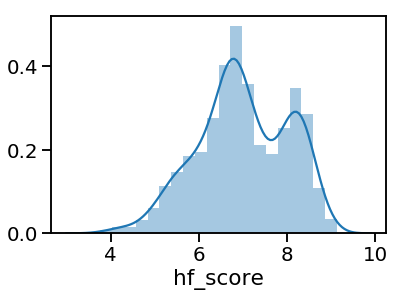

In [21]:
seaborn.distplot(dataset["hf_score"].dropna())


# 2) Agregación de Datos

2.1 Grafiquen la media de la variable pf_identity y hf_score a través de los años.

In [22]:
# Se grafican las medias de las variables 'pf_identity' y 'hf_score'

(0, 10)

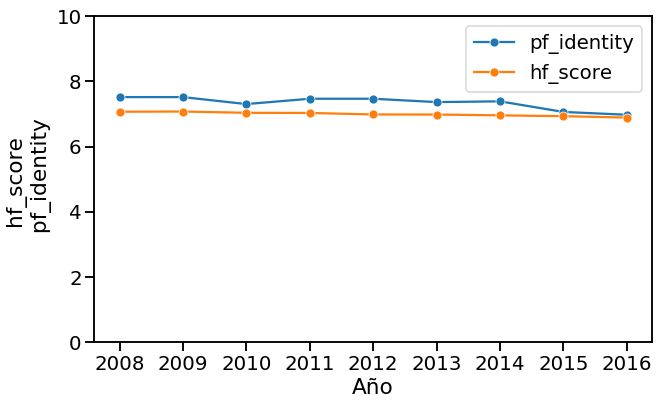

In [23]:
plt.figure(figsize=(10,6))
seaborn.lineplot(x="year",y="pf_identity",data=dataset,marker="o", 
                estimator="mean",ci=None)
seaborn.lineplot(x="year",y="hf_score",data=dataset,marker="o", 
                estimator="mean",ci=None)
plt.ylabel("hf_score \n pf_identity")
plt.xlabel("Año")
plt.legend(["pf_identity","hf_score"])
plt.ylim(0,10)



2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

In [24]:
# Se obtienen las diferentes regiones que contiene el dataset
print('Las regiones consideradas son \n '
      ,numpy.unique(dataset["region"]))

Las regiones consideradas son 
  ['Caucasus & Central Asia' 'East Asia' 'Eastern Europe'
 'Latin America & the Caribbean' 'Middle East & North Africa'
 'North America' 'Oceania' 'South Asia' 'Sub-Saharan Africa'
 'Western Europe']


In [25]:
medias=pandas.DataFrame(dataset, columns=["year","pf_identity","region","hf_score"]).dropna()
medias= pandas.pivot_table(medias, index= "region", columns = "year", aggfunc= "mean")
medias

hf_score                                \
year                               2008      2009      2010      2011   
region                                                                  
Caucasus & Central Asia        7.027743  7.025672  6.975023  6.819008   
East Asia                      7.741378  7.723779  7.769861  7.843124   
Eastern Europe                 7.710244  7.719634  7.696403  7.716152   
Latin America & the Caribbean  7.118196  7.113860  7.087213  7.084865   
Middle East & North Africa     6.342013  6.304318  6.259184  6.211953   
North America                  8.550634  8.449922  8.450481  8.422230   
Oceania                        8.008484  7.887855  7.928538  7.795075   
South Asia                     6.451640  6.552607  6.652849  6.629122   
Sub-Saharan Africa             6.157588  6.207078  6.246401  6.262749   
Western Europe                 8.381446  8.330795  8.335004  8.361464   

                                                                       \
year                               2012      2013      2014      2015   
region                                                                  
Caucasus & Central Asia        6.875845  6.846133  6.849528  6.772257   
East Asia                      7.828456  7.846940  7.862007  7.852107   
Eastern Europe                 7.692239  7.671658  7.675139  7.623544   
Latin America & the Caribbean  7.045974  7.037416  7.015536  6.979706   
Middle East & North Africa     6.076486  5.963931  5.915510  5.820231   
North America                  8.424809  8.407559  8.524919  8.449421   
Oceania                        7.757498  7.800587  7.815776  7.856745   
South Asia                     6.568750  6.540197  6.477795  6.474168   
Sub-Saharan Africa             6.212561  6.341948  6.292692  6.301390   
Western Europe                 8.338814  8.357082  8.426261  8.416442   

                                        pf_identity                        \
year                               2016        2008       2009       2010   
region                                                                      
Caucasus & Central Asia        6.773409    9.500000   9.500000   9.583333   
East Asia                      7.849527   10.000000  10.000000  10.000000   
Eastern Europe                 7.545715    9.880952   9.880952   9.880952   
Latin America & the Caribbean  6.954305    8.900000   8.900000   8.942308   
Middle East & North Africa     5.758610    3.653846   3.653846   2.941176   
North America                  8.477259   10.000000  10.000000  10.000000   
Oceania                        7.878301    9.375000   9.375000   9.375000   
South Asia                     6.467668    5.833333   5.833333   6.166667   
Sub-Saharan Africa             6.265716    4.785714   4.785714   4.736842   
Western Europe                 8.367332   10.000000  10.000000  10.000000   

                                                                           \
year                                2011       2012       2013       2014   
region                                                                      
Caucasus & Central Asia         8.750000   8.750000   8.055556   8.611111   
East Asia                      10.000000  10.000000  10.000000  10.000000   
Eastern Europe                  9.880952   9.880952   9.682540   9.761905   
Latin America & the Caribbean   9.038462   9.038462   9.134615   9.006410   
Middle East & North Africa      3.235294   3.235294   2.268519   2.361111   
North America                  10.000000  10.000000  10.000000  10.000000   
Oceania                         8.750000   8.750000   9.375000   9.375000   
South Asia                      6.000000   6.000000   5.156250   5.539216   
Sub-Saharan Africa              5.460526   5.460526   6.197917   6.128049   
Western Europe                 10.000000  10.000000   9.907407   9.907407   

                                                   
year                               2015      2016  
region                 

(0, 10.5)

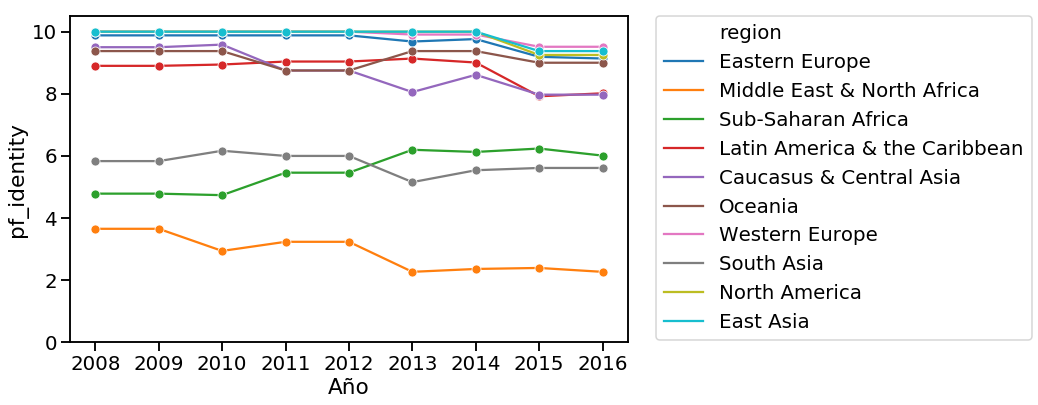

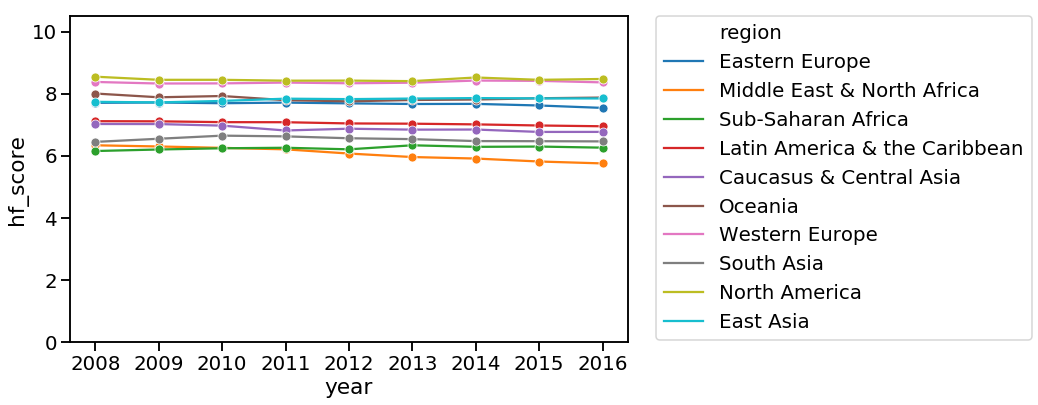

In [26]:
# Medias de pf_identity por region
plt.figure(figsize=(10,6))
seaborn.lineplot(x="year",y="pf_identity",data=dataset,marker="o", 
                hue= "region",estimator="mean",ci=None)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,10.5)
plt.xlabel("Año")

# Medias de hf_score por region
plt.figure(figsize=(10,6))
seaborn.lineplot(x="year",y="hf_score",data=dataset,marker="o", 
                hue= "region",estimator="mean",ci=None)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,10.5)

En ambos casos, la mayoría de las regiones siguen una tendencia similar a la general. En el caso de pf_identity, la gran mayoría presenta bajas en los últimos dos años, en coincidencia con la tendencia general, salvo África Sub-Sahariana y el sur de Asia. Por otro lado, hf_score parece mantenerse constante en las regiones, al igual que en la tendencia general, salvo en Medio Oriente y el Norte de África.

2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Para explicar la tendencia de la variable en la región, se seleccionaron los diez países más poblados de esta, que representan juntos aproximadamente el 87% del total y por lo tanto la mayor parte del movimiento de la variable pf_identity en la región. Como se puede observar, la mayoría de los países se encuentran con valores cercanos a 10, salvo Chile, Guatemala y Venezuela,cuyos indices empeoraron en los ultimos dos años, bajando el promedio de la región.

(0, 10.5)

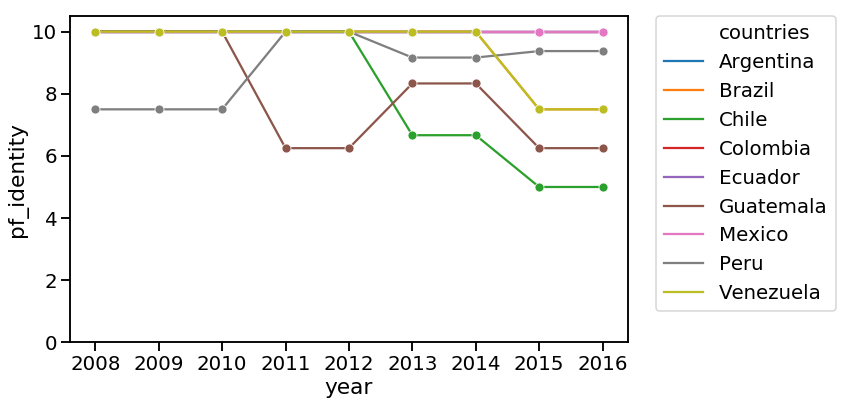

In [27]:
paises_mas_poblados=["Brazil","Mexico","Colombia","Argentina","Peru","Venezuela",
                     "Chile","Ecuador","Guatemala","Cuba"]
dataset_mp=dataset[dataset["countries"].isin(paises_mas_poblados)]
plt.figure(figsize=(10,6))
seaborn.lineplot(x="year",y="pf_identity",data=dataset_mp,marker="o", 
                hue= "countries",estimator="mean",ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,10.5)


# 3) Distribuciones

3.1 Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

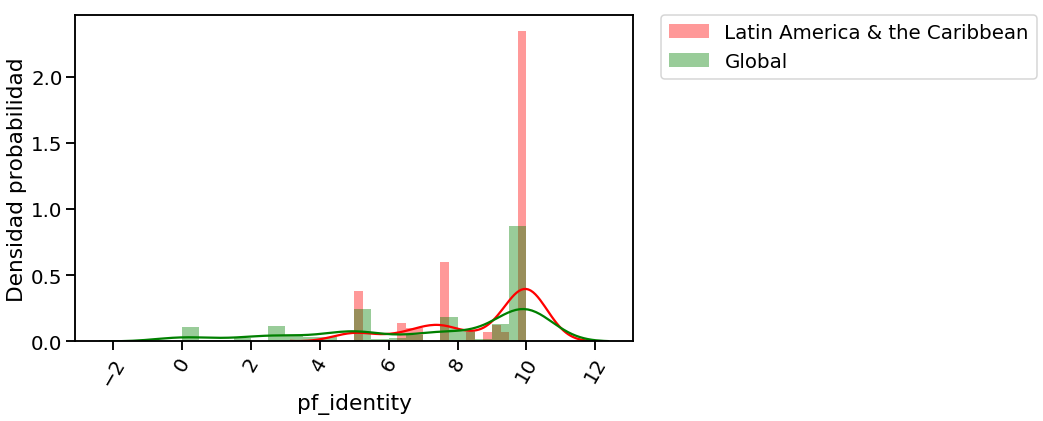

<Figure size 1440x720 with 0 Axes>

In [33]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].dropna(), 
    bins=20, label='Latin America & the Caribbean', color='red')

seaborn.distplot(
    dataset["pf_identity"].dropna(),
    bins=20, label='Global', color='green')

plt.ylabel('Densidad probabilidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)
plt.figure(figsize=(20,10))
seaborn.despine()

Ambas distribuciones son asimétricas izquierdas, y parecen tener varias modas, es decir que son distribuciones multimodales. En el caso de Latinoamérica y el Caribe, pf_identity presenta tres modas pronunciadas, en tanto que en el Mundo, las modas son menos pronunciadas. Si bien parece haber valores muy alejados del resto, todos caen dentro de los valores esperados (0-10), por lo que se mantienen.

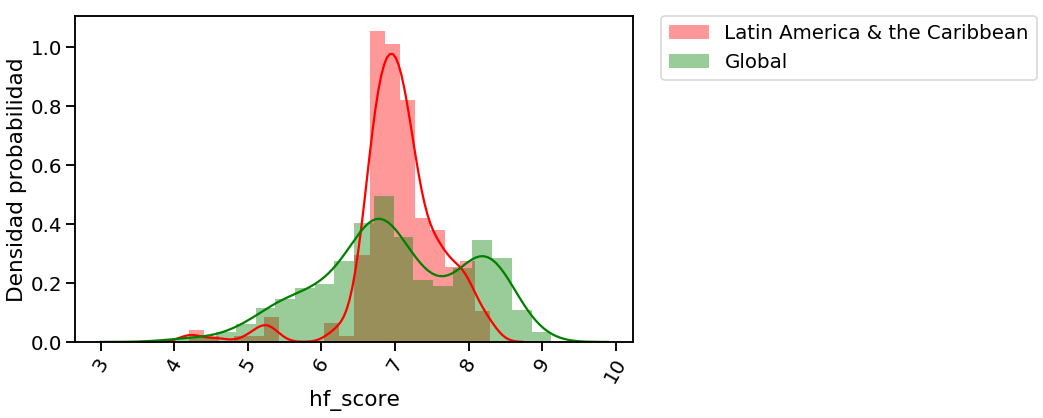

<Figure size 1440x720 with 0 Axes>

In [32]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].dropna(), 
    bins=20, label='Latin America & the Caribbean',color='red')

seaborn.distplot(
    dataset['hf_score'].dropna(),
    bins=20, label='Global', color='green')

plt.ylabel('Densidad probabilidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)
plt.figure(figsize=(20,10))
seaborn.despine()

La distribución de hf_score para el mundo parece ser bimodal, lo que podría indicar que en realidad los datos provienen de dos distribuciones subyacentes. Para Latinoamérica y el Caribe, la distribución presenta una varianza mas acotada y presenta una sola moda, cercana a una de las de los datos globales. Ambas parecen ser asimétricas izquierdas, al igual que en el caso de pf_identity. Si bien se ven algunos valores alejados de la distribución para Latinoamérica y el Caribe, estos no parecen tan extremos al compararse con los datos globales.

3.2 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. 

In [45]:
stats.kstest(dataset["hf_score"].dropna(),"norm")

KstestResult(statistic=0.9999170006054449, pvalue=0.0)

In [46]:
stats.kstest(dataset["pf_identity"].dropna(),"norm")

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

La prueba de Kolmogorov-Smirnof rechaza en ambos casos la hipótesis nula, por lo que se concluye que las variables hf_score y pf_identity no siguen una distribución normal, con un nivel de confianza del 99%.

3.3 Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas

In [28]:
## Utilizaremos todos los datos

matrizlimpia=dataset[important_cols[12:16]]

In [29]:
x=matrizlimpia.dropna()
y=matrizlimpia.dropna()

Distribución para la variable hf_score

In [30]:

from scipy import stats
loc, scale = stats.norm.fit(x['hf_score'])
loc, scale

(6.993443755514514, 1.0254388834900923)

In [31]:
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(2000)


In [145]:
percs = numpy.linspace(0,100,11)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(x['hf_score'], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(x['hf_score'])), percs)

print(percs)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


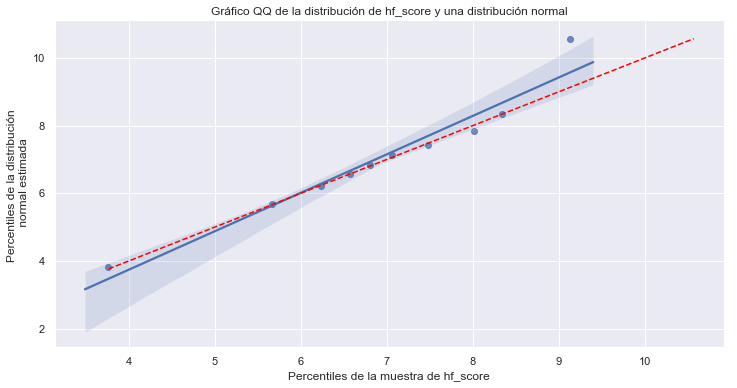

In [34]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de hf_score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='red', ls="--")

seaborn.despine()


Distribución para la variable pf_identity

In [144]:
loc, scale = stats.norm.fit(y['pf_identity'])
loc, scale

(7.334179970968069, 3.1583260555019637)

In [36]:
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(2000)

In [37]:
percs = numpy.linspace(0,100,11)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(y['pf_identity'], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(y['pf_identity'])), percs)

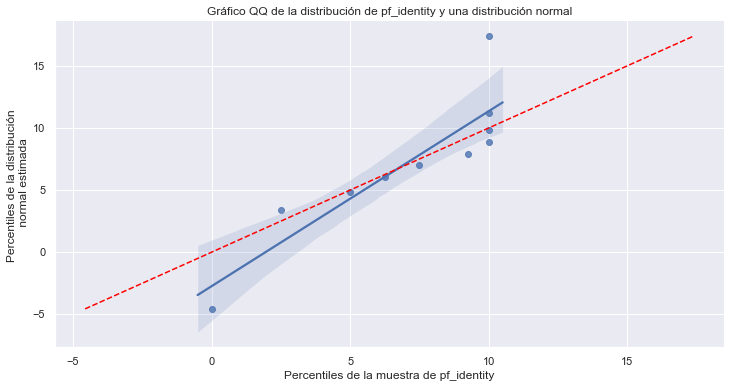

In [38]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity y una distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='red', ls="--")

seaborn.despine()

In [148]:
percs = numpy.linspace(0,100,11)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.
hf_sample = numpy.percentile(x['hf_score'], percs)
pf_sample = numpy.percentile(y['pf_identity'], percs)


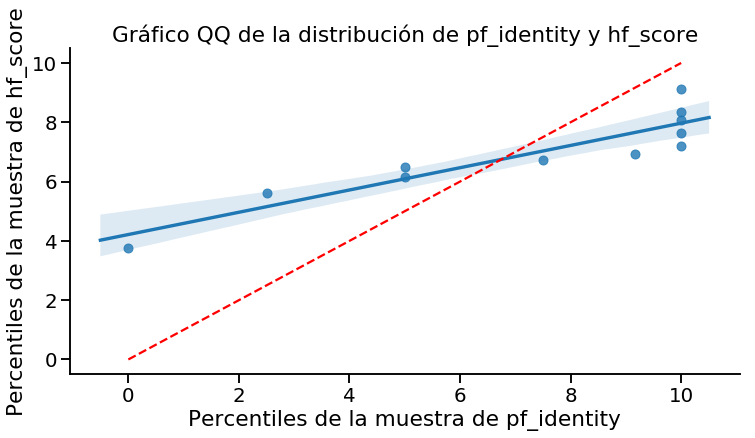

In [149]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=pf_sample, y=hf_sample)
plt.xlabel('Percentiles de la muestra de pf_identity')
plt.ylabel('Percentiles de la muestra de hf_score')
plt.title('Gráfico QQ de la distribución de pf_identity y hf_score')
x = numpy.linspace(numpy.min((pf_sample.min(), hf_sample.min())), numpy.max((pf_sample.max(),hf_sample.max())))
plt.plot(x,x, color='red', ls="--")

seaborn.despine()

3.4 Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [136]:
## Simetría y curtosis para la variable "hf_score"

from scipy import stats
loc, scale = stats.norm.fit(x['hf_score'])
loc, scale

norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(2000)

percs = numpy.linspace(0,100,11)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(x['hf_score'], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(x['hf_score'])), percs)

In [151]:
print("Distribución de la variable hf_score \n")
print('La curtosis es igual a: ', scipy.stats.kurtosis(hf_sample))
print('La asimetría es igual a: ', scipy.stats.skew(hf_sample))

Distribución de la variable hf_score 

La curtosis es igual a:  0.20202985633683834
La asimetría es igual a:  -0.6176654061859242


In [141]:
loc, scale = stats.norm.fit(y['pf_identity'])
loc, scale

norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(2000)

percs = numpy.linspace(0,100,10)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(y['pf_identity'], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(y['pf_identity'])), percs)

In [150]:
print("Distribución de la variable pf_identity \n")
print('La curtosis es igual a: ', scipy.stats.kurtosis(pf_sample))
print('La asimetría es igual a: ', scipy.stats.skew(pf_sample))

Distribución de la variable pf_identity 

La curtosis es igual a:  -0.576933302657701
La asimetría es igual a:  -0.8825969984620313


Los resultados que arroja la asimetría para las distribuciones de ambas variables coinciden con lo obtenido anteriormente.
Ambas variables presentan una asimetría izquierda (el coeficiente de asimetría es negativo en ambos casos), siendo mayor la asimetría de la variable pf_identity.
Esto significa que la cola de distribución se alarga para valores inferiores a la media

Para el caso de la variable hf_score, el coeficiente positivo obtenido indica que la distribución es más escarpada (leptocurtica). Esto significa que los datos se encuentran cercanos a la media.
Sin embargo, para el caso de la variable pf_identity no ocurre lo mismo, ya que el coeficiente negativo obtenido nos indica que la curva de distribución es más achatada (platicúrtica), lo cual indica que los valores se encuentran más alejados de la media.

Al observar el gráfico QQ del punto anterior, podemos ver que si bien los puntos están alineados, la tendencia está por debajo de la identidad (tiene menor pendiente la tendencia). Esto significa que la distribución del eje x (de la variable pf_identity) es mayor que la de la variable hf_score. Esto se verifica al comparar la curtosis de ambas variables. Como la curtosis de la variable pf_identity es menor (-0.57693302657701 < 0.20202985633683834 ), implica que los valores se encuentran más alejados de la media, es decir, están más dispersos.

# 4) Correlaciones

En este ejercicio queremos responder a las preguntas

Las libertades sociales y económicas, ¿van siempre de la mano?
¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?
Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score.

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación

4.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

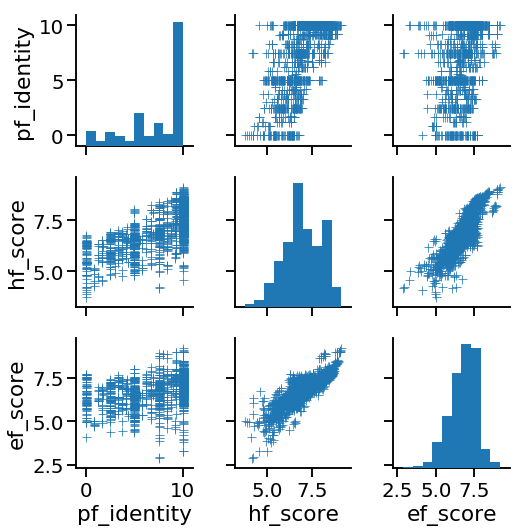

In [50]:
dataset_1=dataset[['pf_identity', 'hf_score', 'ef_score']].dropna()
seaborn.pairplot(markers="+",
    data=dataset_1,
    vars=['pf_identity', 'hf_score', 'ef_score'])

Del pairplot anterior se puede observar una aparente correlación positiva entre las variables hf_score y ef_score, indicando que las libertades sociales y económicas van de la mano. También se puede observar que las libertades personales(pf_identity) tienen una mayor correlación positiva con las libertades humanas(hf_score) que con las económicas (ef_score).
El problema con pf_identity es que tiene el comportamiento de una variable discreta, por lo que los puntos se concentran en determinados valores y muchas veces se superponen, lo que dificulta cuantificar efectivamente cuántos puntos hay en cada región. Para salvar este problema pueden usarse marcadores en forma de cruz, o marcadores con colores transparentes en los que se distingue cuando en una región hay muchos puntos por la intensidad del color.

4.2 Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

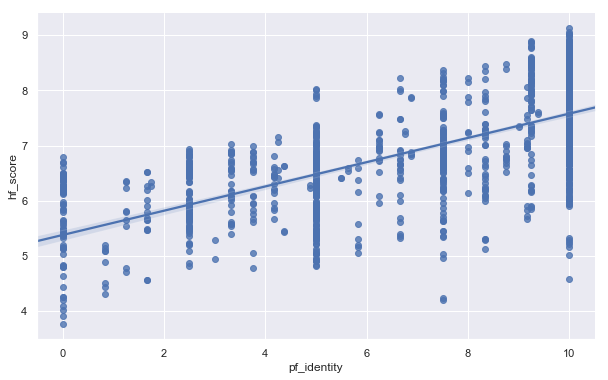

In [126]:
# RegPlot para las variables pf_identity y hf_score

plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset_1,
                    x='pf_identity',
                    y='hf_score')
seaborn.despine()
               

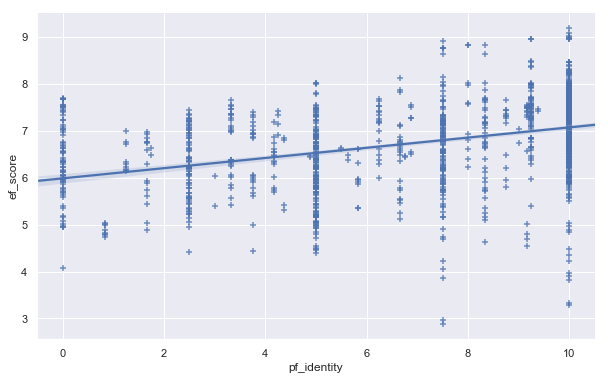

In [127]:
# RegPlot para las variables pf_identity y ef_score

plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset_1,
                    x='pf_identity', y='ef_score',
                    marker='+')

seaborn.despine()

4.3 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

KendalltauResult(correlation=0.5213095523555771, pvalue=3.65763160993025e-157)

Ya que la prueba de Kolmogorov-Smirnof rechaza que las variables sigan una distribución normal, el test de Pearson no resulta adecuado, ya que este requiere que sean normales. En cambio los tests de Spearman y Tau de Kendall no hacen tal suposición aunque si requieren que las variables sean ordinales. Como esta última condición se cumple, usaremos ambos tests para probar si hay correlación o no entre hf_score y pf_identity.

In [55]:
print(scipy.stats.spearmanr(dataset_1["pf_identity"],dataset_1["hf_score"]))
print(scipy.stats.kendalltau(dataset_1["pf_identity"],dataset_1["hf_score"]))

SpearmanrResult(correlation=0.6861094212039192, pvalue=2.3804640834918467e-192)
KendalltauResult(correlation=0.5213095523555771, pvalue=3.65763160993025e-157)


In [ ]:
Ambos test rechazan la hipotesis nula de no correlación, a favor de una correlación positiva.

4.4 [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)